In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)
housing.head() #OPEN DATA FRAME
pd.set_option('display.max_columns', 500)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [2]:
#Create seperate numeric-set
housing_numeric = housing[['PID','GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].copy()
housing_numeric['PID'] = housing_numeric['PID'].astype('str')
housing_numeric = housing_numeric.fillna(0)
housing_numeric

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,909176150,856,126000,0.0,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0
2,905476230,1049,139500,42.0,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0
3,911128020,1001,124900,60.0,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0
4,535377150,1039,114000,80.0,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0
5,534177230,1665,227000,70.0,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,0.0,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,1,0,2,1,4,1,1.0,192.0,0,98,0,0,40,0,0
760,905402060,1733,139600,0.0,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,2,0,4,1,8,1,2.0,452.0,0,0,0,0,0,0,0
761,909275030,2002,145000,82.0,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,2,0,4,2,8,0,3.0,871.0,0,0,0,0,0,0,0
762,907192040,1842,217500,0.0,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,2,1,3,1,7,1,2.0,486.0,193,96,0,0,0,0,0


In [3]:
#Create seperate factor-set
housing_factor = housing.drop(['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1)
housing_factor['PavedDrive'] = housing_factor.PavedDrive.apply(lambda Paved: 1 if Paved != "N" else 0)
housing_factor['CentralAir'] = housing_factor.CentralAir.apply(lambda Central: 1 if Central != "N" else 0) #Convert Y/N to Booleon 
housing_factor[['PID','MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath']] = housing_factor[['PID','MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath']].astype(str)
housing_factor['YrSold'] = pd.to_datetime(housing_factor['YrSold']).dt.strftime('%Y')
housing_factor['GarageYrBlt'] = pd.to_datetime(housing_factor['GarageYrBlt']).dt.strftime('%Y')
housing_factor['YearBuilt'] = pd.to_datetime(housing_factor['YearBuilt']).dt.strftime('%Y')
housing_factor['YearRemodAdd'] = pd.to_datetime(housing_factor['YearRemodAdd']).dt.strftime('%Y')
housing_factor['MoSold'] = pd.to_datetime(housing_factor['MoSold'],format='%m').dt.strftime('%m')
housing_factor[['PavedDrive','CentralAir']] = housing_factor[['PavedDrive','CentralAir']].astype('bool')
housing_factor #transform all integers into categorical variables
housing_factor.dtypes[housing_factor.dtypes == 'int64']
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,1.0,0.0,TA,Typ,Gd,Detchd,1970,Unf,TA,TA,True,NaN,NaN,NaN,03,1970,WD,Normal
2,905476230,120,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,1970,Fin,TA,TA,True,NaN,NaN,NaN,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1970,1970,Hip,CompShg,MetalSd,MetalSd,NaN,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,0.0,0.0,Gd,Typ,NaN,Detchd,1970,Unf,TA,Po,False,NaN,NaN,NaN,11,1970,WD,Normal
4,535377150,70,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1970,1970,Gable,CompShg,MetalSd,MetalSd,NaN,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,0.0,0.0,TA,Typ,NaN,Detchd,1970,Unf,TA,TA,False,NaN,NaN,NaN,05,1970,WD,Normal
5,534177230,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,1970,1970,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,1970,Fin,TA,TA,True,NaN,NaN,NaN,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,0.0,0.0,Fa,Typ,Gd,Detchd,1970,Unf,Fa,Po,True,NaN,NaN,NaN,05,1970,WD,Normal
760,905402060,20,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1970,1970,Hip,CompShg,BrkFace,Wd Sdng,NaN,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,True,FuseA,0.0,0.0,TA,Min2,Gd,Attchd,1970,Unf,TA,TA,True,NaN,NaN,NaN,06,1970,WD,Normal
761,909275030,90,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1970,1970,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,0.0,0.0,TA,Typ,NaN,2Types,1970,Unf,TA,TA,True,NaN,NaN,NaN,08,1970,WD,Normal
762,907192040,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1970,1970,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,1970,Fin,TA,TA,True,NaN,NaN,NaN,07,1970,WD,Normal


In [4]:
#Get rid of all NAs
housing_factor['MiscFeature'] = housing_factor['MiscFeature'].fillna('NoFeature')
housing_factor['PoolQC'] = housing_factor['PoolQC'].fillna('NoPool')
housing_factor['Fence'] = housing_factor['Fence'].fillna('NoFence')
housing_factor['GarageQual'] = housing_factor['GarageQual'].fillna('NoGarage')
housing_factor['GarageCond'] = housing_factor['GarageCond'].fillna('NoGarage')
housing_factor['GarageFinish'] = housing_factor['GarageFinish'].fillna('NoGarage')
housing_factor['GarageYrBlt'] = housing_factor['GarageYrBlt'].fillna('1970') #903426160 and 910201180 do have a garage built, but an NA for all others, filled with mode
housing_factor['GarageType'] = housing_factor['GarageType'].fillna('NoGarage')
housing_factor['FireplaceQu'] = housing_factor['FireplaceQu'].fillna('NoFireplace')
housing_factor['BsmtFinType2'] = housing_factor['BsmtFinType2'].fillna('NoBsmt') #528142130 has a basement, but NA for values
housing_factor['BsmtFinType1'] = housing_factor['BsmtFinType1'].fillna('NoBsmt')
housing_factor['BsmtExposure'] = housing_factor['BsmtExposure'].fillna('NoBsmt')
housing_factor['BsmtCond'] = housing_factor['BsmtCond'].fillna('NoBsmt')
housing_factor['BsmtQual'] = housing_factor['BsmtQual'].fillna('NoBsmt') #916386080 is missing an electrical value  veneer
housing_factor['MasVnrType'] = housing_factor['MasVnrType'].fillna('NoVeneer')
housing_factor['Alley'] = housing_factor['Alley'].fillna('NoAlley')

housing_factor.to_pickle('housing_factor.pkl')
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,1.0,0.0,TA,Typ,Gd,Detchd,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,03,1970,WD,Normal
2,905476230,120,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,1.0,0.0,Gd,Typ,NoFireplace,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1970,1970,Hip,CompShg,MetalSd,MetalSd,NoVeneer,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,0.0,0.0,Gd,Typ,NoFireplace,Detchd,1970,Unf,TA,Po,False,NoPool,NoFence,NoFeature,11,1970,WD,Normal
4,535377150,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1970,1970,Gable,CompShg,MetalSd,MetalSd,NoVeneer,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,0.0,0.0,TA,Typ,NoFireplace,Detchd,1970,Unf,TA,TA,False,NoPool,NoFence,NoFeature,05,1970,WD,Normal
5,534177230,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,1970,1970,Gable,CompShg,VinylSd,VinylSd,NoVeneer,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,NoFireplace,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,0.0,0.0,Fa,Typ,Gd,Detchd,1970,Unf,Fa,Po,True,NoPool,NoFence,NoFeature,05,1970,WD,Normal
760,905402060,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1970,1970,Hip,CompShg,BrkFace,Wd Sdng,NoVeneer,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,GasA,Ex,True,FuseA,0.0,0.0,TA,Min2,Gd,Attchd,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,06,1970,WD,Normal
761,909275030,90,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1970,1970,Gable,CompShg,MetalSd,MetalSd,NoVeneer,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,0.0,0.0,TA,Typ,NoFireplace,2Types,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,08,1970,WD,Normal
762,907192040,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1970,1970,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,07,1970,WD,Normal


In [5]:
from sklearn.preprocessing import LabelEncoder
SalePrice = housing['SalePrice'] #This is the target
years = housing_factor[["YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
housing_factor_dummified1 = housing_factor.drop(['PID', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd'], axis=1)
label_encoder = LabelEncoder()
#housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']] = label_encoder.fit_transform(housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']])

housing_factor_dummified1= housing_factor_dummified1.apply(label_encoder.fit_transform)

housing_factor_dummified1 = pd.get_dummies(housing_factor_dummified1, drop_first = True)
housing_factor_dummified1

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,1,0,4,6,2,5,3,5,5,1,3,4,1,9,4
2,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
3,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,0,0,2,6,3,5,3,5,4,0,3,4,1,9,4
4,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,0,0,4,6,3,5,3,5,5,0,3,4,1,9,4
5,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,0,0,1,6,2,5,3,1,4,1,3,4,1,9,4
760,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,0,0,4,3,2,1,3,5,5,1,3,4,1,9,4
761,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4
762,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,5,1,0,5,5,1,3,4,1,9,4


In [6]:
pd.set_option('display.max_rows', 500)
#housing_numeric = pd.concat([housing_numeric, years], axis=1)
housing_numeric.to_pickle('housing_numeric.pkl')
housing_factor_dummified1 = pd.concat([housing_numeric, housing_factor_dummified1], axis=1)
#housing_factor_dummified1 = pd.concat([housing_factor_dummified1,housing_factor[["YrSold",'GarageYrBlt','MoSold','PavedDrive','YearBuilt', 'YearRemodAdd', 'CentralAir']]], axis = 1)
housing_factor_dummified1

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,909176150,856,126000,0.0,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,1,0,4,6,2,5,3,5,5,1,3,4,1,9,4
2,905476230,1049,139500,42.0,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
3,911128020,1001,124900,60.0,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,0,0,2,6,3,5,3,5,4,0,3,4,1,9,4
4,535377150,1039,114000,80.0,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,0,0,4,6,3,5,3,5,5,0,3,4,1,9,4
5,534177230,1665,227000,70.0,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,0.0,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,1,0,2,1,4,1,1.0,192.0,0,98,0,0,40,0,0,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,0,0,1,6,2,5,3,1,4,1,3,4,1,9,4
760,905402060,1733,139600,0.0,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,2,0,4,1,8,1,2.0,452.0,0,0,0,0,0,0,0,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,0,0,4,3,2,1,3,5,5,1,3,4,1,9,4
761,909275030,2002,145000,82.0,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,2,0,4,2,8,0,3.0,871.0,0,0,0,0,0,0,0,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4
762,907192040,1842,217500,0.0,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,2,1,3,1,7,1,2.0,486.0,193,96,0,0,0,0,0,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,5,1,0,5,5,1,3,4,1,9,4


In [7]:
from sklearn.linear_model import LinearRegression
housing_factor_dummified1 = housing_factor_dummified1.drop(['PID'], axis=1)
lm = LinearRegression()
lm.fit(housing_factor_dummified1, housing['SalePrice'])

LinearRegression()

(array([1.000e+00, 0.000e+00, 9.000e+00, 6.000e+00, 7.000e+00, 8.400e+01,
        2.150e+02, 8.200e+02, 1.364e+03, 7.400e+01]),
 array([-6.98491931e-10, -6.10816642e-10, -5.23141352e-10, -4.35466063e-10,
        -3.47790774e-10, -2.60115485e-10, -1.72440195e-10, -8.47649062e-11,
         2.91038305e-12,  9.05856723e-11,  1.78260962e-10]),
 <BarContainer object of 10 artists>)

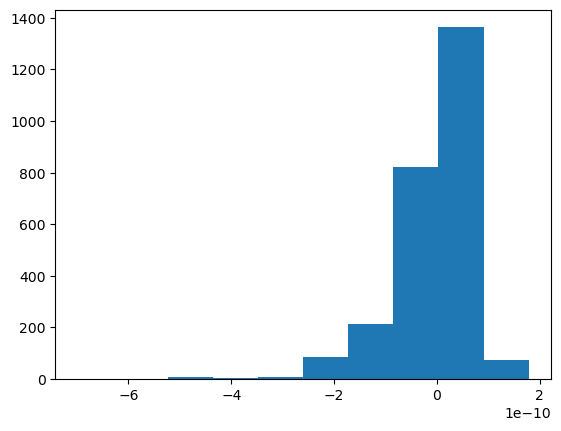

In [8]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [9]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 1.000
RSS is equal to 0.000
The intercept is -0.000
The slopes are [-9.90439082e-15  1.00000000e+00 -2.08999484e-14  4.54497551e-16
  4.04364042e-15  6.01818942e-15  1.19324852e-14 -3.67934849e-15
  1.42763405e-14 -2.09305771e-14  6.27145905e-15  4.76550223e-15
 -1.33826583e-12  8.88771830e-13  2.93903614e-13  1.17380089e-12
  1.25108183e-13 -6.71230723e-13 -1.81659894e-12  7.97127121e-15
 -4.09936841e-16 -5.84397168e-15 -6.97337153e-15 -9.83195188e-15
 -3.04643463e-14 -5.33804907e-15 -7.01050546e-15 -4.02903893e-14
  1.14547592e-13 -4.40189155e-12  1.44780748e-13 -1.02519752e-12
 -3.60307606e-14 -2.08603235e-12  7.92363658e-13 -1.59969865e-12
 -5.60073601e-14 -3.26745638e-14 -9.84598266e-13 -1.02471135e-13
  1.16085426e-13  2.78985511e-13 -8.24125826e-14  5.26509202e-13
  2.91940087e-13  3.23476546e-14 -1.00882979e-13  1.05700297e-12
  2.32124485e-12 -4.56036510e-13  6.33779389e-13 -6.56812488e-14
 -2.36232619e-13 -3.09813502e-13 -4.31390931e-13  1.28707274e-12
  3.205

In [10]:
print('negative slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ > 0]))

negative slope column names Index(['GrLivArea', 'LotFrontage', 'BsmtUnfSF', '1stFlrSF', 'FullBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSSubClass', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'OverallCond', 'Exterior2nd', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')
positive slope column names Index(['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'MSZoning', 'Alley',
       '

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+01,
        1.130e+02, 1.878e+03, 5.620e+02, 1.000e+01]),
 array([-1.28795899, -1.12156964, -0.95518028, -0.78879093, -0.62240157,
        -0.45601221, -0.28962286, -0.1232335 ,  0.04315585,  0.20954521,
         0.37593457]),
 <BarContainer object of 10 artists>)

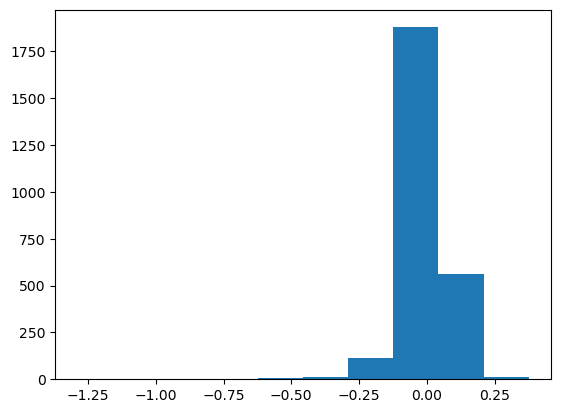

In [11]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified1, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [12]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.958
RSS is equal to 16.165
The intercept is 10.371
The slopes are [ 2.85179854e-05  3.55789854e-06 -4.24996340e-05  4.77981901e-07
 -9.37339810e-05  3.40865148e-06  1.95289943e-05  1.04529354e-05
  3.33905812e-05  3.48615340e-05  7.78310238e-06 -1.41266510e-05
  2.85125761e-02  1.54111563e-02  6.71511042e-03 -1.66349752e-02
  2.76921643e-03  7.41347997e-03  2.06881245e-02 -2.45908656e-05
  1.64757966e-06  2.43279925e-05  5.83374778e-05  7.43944569e-05
  8.36737718e-05  4.95449828e-05  8.56285835e-07  2.39549993e-03
 -1.09226638e-02  5.93325185e-02  1.81487321e-02 -2.22251730e-03
  2.28509670e-03 -4.23481511e-02  1.85366735e-04  1.10446121e-02
 -4.96810639e-04  1.65239533e-03 -1.01328521e-02  2.26232824e-03
 -1.26973806e-04  3.23473269e-02  2.35283737e-02 -3.55563300e-03
 -4.14219728e-04  1.00898540e-05  2.29639214e-03 -7.13908499e-03
  1.26130807e-02  7.80992429e-03  1.09890419e-02  1.61590592e-03
  1.35801653e-03 -3.04280504e-03 -4.46820125e-03  1.56107701e-03
  8.57

In [13]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified1.columns):
        myColumns = housing_factor_dummified1.columns[(idx+1):]
        pass

In [14]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified1.columns, 3)

for c in combos:
    X = housing_factor_dummified1[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [15]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('SalePrice', 'OverallQual', 'CentralAir'), 0.9335139587093141),
 (('SalePrice', 'OverallQual', 'PavedDrive'), 0.9307352599242298),
 (('SalePrice', 'OverallQual', 'GarageType'), 0.9299464898459083),
 (('SalePrice', 'OverallQual', 'GarageCond'), 0.9298411132584817),
 (('SalePrice', 'OverallQual', 'GarageQual'), 0.928336879056669),
 (('SalePrice', 'OverallQual', 'ExterQual'), 0.9269506262461966),
 (('SalePrice', 'BedroomAbvGr', 'OverallQual'), 0.9265768921309104),
 (('SalePrice', 'GarageCars', 'OverallQual'), 0.9261280415016706),
 (('SalePrice', 'OverallQual', 'OverallCond'), 0.9259767470985246),
 (('SalePrice', 'OverallQual', 'Electrical'), 0.9257922076690069),
 (('SalePrice', 'OverallQual', 'BsmtFinType1'), 0.9257661555242438),
 (('SalePrice', 'FullBath', 'OverallQual'), 0.9257446506807475),
 (('GrLivArea', 'SalePrice', 'OverallQual'), 0.9257284408135782),
 (('SalePrice', 'GarageArea', 'OverallQual'), 0.9251465920016113),
 (('SalePrice', 'TotRmsAbvGrd', 'OverallQual'), 0.925110302336

In [16]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified1)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     787.3
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        04:16:21   Log-Likelihood:                 2882.9
No. Observations:                2580   AIC:                            -5618.
Df Residuals:                    2506   BIC:                            -5184.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.3706      0.069    150.627      0.000      10.236      10.506
GrLivArea      2.852e-05    1.1e-05      2.582      0.010    6.86e-06    5.02e-05
SalePrice      3.558e-06   6.17e-08     57.666      0.000    3.44e-06    3.68e-06
LotFrontage    -4.25e-05    5.4e-05     -0.787      0.432      -0.000    6.35e-05
LotArea         4.78e-07   2.42e-07      1.976      0.048    3.68e-09    9.52e-07
MasVnrArea    -9.373e-05   1.21e-05     -7.748      0.000      -0.000      -7e-05
BsmtFinSF1     3.409e-06   5.56e-06      0.613      0.540    -7.5e-06    1.43e-05
BsmtFinSF2     1.953e-05   1.02e-05      1.913      0.056   -4.91e-07    3.95e-05
BsmtUnfSF      1.045e-05   5.25e-06      1.992      0.046    1.65e-07    2.07e-05
TotalBsmtSF    3.339e-05   6.35e-06      5.259      0.000    2.09e-05    4.58e-05
1stFlrSF       3.486e-05   1.14e-05      3.061      0.002    1.25e-05    5.72e-05
2ndFlrSF       7.783e-06   1.06e-05      0.736      0.462   -1.29e-05    2.85e-05
LowQualFinSF  -1.413e-05   2.81e-05     -0.503      0.615   -6.92e-05    4.09e-05
FullBath          0.0285      0.005      5.914      0.000       0.019       0.038
HalfBath          0.0154      0.005      3.279      0.001       0.006       0.025
BedroomAbvGr      0.0067      0.003      2.112      0.035       0.000       0.013
KitchenAbvGr     -0.0166      0.011     -1.486      0.137      -0.039       0.005
TotRmsAbvGrd      0.0028      0.002      1.240      0.215      -0.002       0.007
Fireplaces        0.0074      0.003      2.363      0.018       0.001       0.014
GarageCars        0.0207      0.005      3.941      0.000       0.010       0.031
GarageArea    -2.459e-05   1.82e-05     -1.349      0.177   -6.03e-05    1.12e-05
WoodDeckSF     1.648e-06   1.39e-05      0.118      0.906   -2.57e-05     2.9e-05
OpenPorchSF    2.433e-05   2.68e-05      0.909      0.364   -2.82e-05    7.68e-05
EnclosedPorch  5.834e-05   2.69e-05      2.167      0.030    5.54e-06       0.000
3SsnPorch      7.439e-05   6.34e-05      1.174      0.241   -4.99e-05       0.000
ScreenPorch    8.367e-05   2.95e-05      2.832      0.005    2.57e-05       0.000
PoolArea       4.954e-05   5.91e-05      0.838      0.402   -6.64e-05       0.000
MiscVal        8.563e-07   3.32e-06      0.258      0.796   -5.65e-06    7.36e-06
MSSubClass        0.0024      0.001      3.082      0.002       0.001       0.004
MSZoning         -0.0109      0.002     -4.803      0.000      -0.015      -0.006
Street            0.0593      0.027      2.170      0.030       0.006       0.113
Alley             0.0181      0.007      2.602      0.009       0.004       0.032
LotShape         -0.0022      0.001     -1.704      0.088      -0.005       0.000
LandContour       0.0023      0.003      0.863      0.388      -0.003       0.007
Utilities        -0.0423      0.060     -0.711   

In [17]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


const            0.000000e+00
SalePrice        0.000000e+00
OverallQual      5.636166e-81
OverallCond      5.469169e-40
CentralAir       1.036501e-21
MasVnrArea       1.347711e-14
PavedDrive       7.430649e-13
GarageType       9.917539e-13
SaleCondition    1.033837e-11
FullBath         3.785003e-09
TotalBsmtSF      1.570709e-07
HeatingQC        6.523747e-07
GarageCond       1.022654e-06
MSZoning         1.652782e-06
BsmtFinType1     5.322799e-06
GarageCars       8.339957e-05
Foundation       1.734309e-04
ExterCond        5.138616e-04
ExterQual        8.992297e-04
HalfBath         1.054824e-03
MSSubClass       2.080116e-03
1stFlrSF         2.226618e-03
BsmtFullBath     2.642271e-03
Electrical       2.983106e-03
ScreenPorch      4.662192e-03
Alley            9.311348e-03
GrLivArea        9.870298e-03
Exterior2nd      1.087146e-02
Fireplaces       1.818971e-02
MasVnrType       2.339317e-02
SaleType         2.577617e-02
GarageQual       2.938597e-02
Street           3.011833e-02
EnclosedPo

In [18]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


LotFrontage     0.431632
BsmtFinSF1      0.540230
BsmtFinSF2      0.055882
2ndFlrSF        0.461553
LowQualFinSF    0.614834
KitchenAbvGr    0.137322
TotRmsAbvGrd    0.215068
GarageArea      0.177419
WoodDeckSF      0.905837
OpenPorchSF     0.363598
3SsnPorch       0.240707
PoolArea        0.402126
MiscVal         0.796255
LotShape        0.088445
LandContour     0.388113
Utilities       0.477291
LotConfig       0.859071
LandSlope       0.159735
Condition1      0.394599
Condition2      0.190951
BldgType        0.276025
HouseStyle      0.917871
RoofStyle       0.103729
RoofMatl        0.893516
Exterior1st     0.991940
BsmtQual        0.247305
BsmtCond        0.446107
BsmtExposure    0.086168
BsmtFinType2    0.386554
Heating         0.232079
BsmtHalfBath    0.886183
KitchenQual     0.711620
Functional      0.209119
GarageFinish    0.821239
PoolQC          0.182598
Fence           0.925145
MiscFeature     0.394859
dtype: float64